<a href="https://colab.research.google.com/github/terapyo1304/ML-Lab-sem-6/blob/main/LAB%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from google.colab import files

In [2]:
uploaded=files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
diabetes_data = pd.read_csv('diabetes.csv')

In [4]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [6]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)


In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [8]:
y = diabetes_data_copy.Outcome


In [9]:
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA()
X_pca = pca.fit_transform(X)


In [10]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.28528309 0.18695388 0.14268497 0.11458322 0.09610566 0.06797266
 0.05855851 0.04785802]


In [11]:
# Cumulative explained variance
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print("Cumulative Explained Variance Ratio:", cumulative_variance_ratio)


Cumulative Explained Variance Ratio: [0.28528309 0.47223697 0.61492194 0.72950516 0.82561081 0.89358347
 0.95214198 1.        ]


In [12]:
# Determine the number of components to retain
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print("Number of Components to Retain:", n_components)

Number of Components to Retain: 7


In [13]:
# Re-fit PCA with the determined number of components
pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X)

In [14]:
# Visualize the effect of dimensionality reduction using scatter plots
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Original Data')

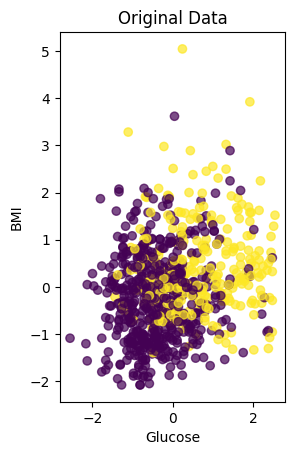

In [15]:
# Original Data
plt.subplot(1, 2, 1)
plt.scatter(X['Glucose'], X['BMI'], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Original Data')

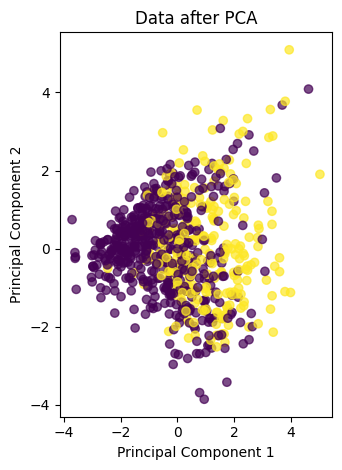

In [16]:
# Data after PCA
plt.subplot(1, 2, 2)
plt.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data after PCA')

plt.tight_layout()
plt.show()

In [17]:
# Number of dimensions before PCA
num_dimensions_before_pca = X.shape[1]
print("Number of dimensions before PCA:", num_dimensions_before_pca)

# Perform PCA for dimensionality reduction
pca = PCA()
X_pca = pca.fit_transform(X)

# Number of dimensions after PCA
num_dimensions_after_pca = pca.n_components_
print("Number of dimensions after PCA:", num_dimensions_after_pca)

Number of dimensions before PCA: 8
Number of dimensions after PCA: 8


##  PCA did not reduce the dimensionality of the dataset. This happened  because the original dataset already had linearly independent features or if PCA did not find any significant reduction in variance by projecting the data onto lower-dimensional space.